# **Capstone Module 3 (Machine Learning) - Bank Marketing Campaign**
# **JCDS 0406 001 - Abdul Hadi Setiawan**

## Business Problem Understanding

**Context / Domain Knowledge**

Jenis produk keuangan yang digunakan masyarakat semakin bervariasi. Salah satu produk keuangan yang banyak dikenal masyarakat adalah deposito berjangka. Mekanisme deposito berjangka adalah nasabah menyetorkan sejumlah uangnya ke bank atau lembaga keuangan, dan uang tersebut baru dapat ditarik setelah jangka waktu tertentu. Sebagai kompensasinya, nasabah akan diberikan bunga tetap sesuai dengan jumlah nominal uang yang disetorkan. Meski demikian, sebagai badan usaha yang memiliki produk keuangan dan nasabah masing-masing, bank tetap harus bersaing agar tidak kehilangan nasabah. Salah satu cara untuk mendapatkan pelanggan baru adalah dengan melakukan kampanye pemasaran.

**Problem Statement :**

Bank berkomitmen untuk terus bersaing agar tidak kehilangan nasabah. Salah satu cara untuk mencapai hal tersebut adalah dengan melakukan Kampanye Pemasaran untuk memperoleh pelanggan baru. Namun pihak bank ingin Kampanye Pemasaran ini berjalan efisien sehingga dapat meminimalkan biaya dan waktu.

Berdasarkan data Marketing Campaign sebelumnya, agar Marketing Campaign lebih efisien maka diperlukan suatu sistem yang dapat membantu pihak bank khususnya Tim Marketing dalam memprediksi apakah calon nasabah tertarik untuk melakukan deposit atau tidak setelah menerima tawaran melalui Kampanye Pemasaran. Karena jika bank menawarkan produk simpanan kepada calon nasabah yang tidak berminat, maka akan mengakibatkan terbuangnya biaya dan waktu dalam melakukan Kampanye Pemasaran.

**Goals :**

Untuk mengatasi tantangan tersebut, bank berkeinginan untuk memiliki kemampuan memproyeksikan sejauh mana kemungkinan seorang calon nasabah akan atau tidak akan menempatkan depositonya. Hal ini bertujuan untuk dapat mengarahkan kampanye pemasaran pada calon nasabah yang lebih cenderung untuk menempatkan deposito di bank.

Selain itu, perusahaan ingin mengetahui faktor atau variabel apa yang mempengaruhi keputusan seorang calon nasabah untuk menempatkan deposito atau tidak. Tujuannya adalah untuk merancang strategi pendekatan yang lebih efektif terhadap calon nasabah potensial yang berminat untuk menempatkan deposito mereka.

**Analytic Approach**

Saya akan melakukan analisis untuk mengidentifikasi pola dan ciri-ciri yang membedakan calon nasabah yang berminat melakukan deposit dengan yang tidak berminat, berdasarkan fitur-fitur yang tersedia.

Kemudian saya akan membangun model klasifikasi yang akurat untuk memprediksi kemungkinan calon nasabah tertarik atau tidak tertarik melakukan deposit.

**Method Evaluation**

TP : Calon Nasabah diprediksi tertarik untuk melakukan deposit dan benar-benar tertarik untuk melakukan deposit.

TN : Calon Nasabah diperkirakan tidak tertarik untuk melakukan deposit dan sebenarnya tidak tertarik untuk melakukan deposit.

FP: Calon Nasabah diprediksi tertarik untuk melakukan deposit namun sebenarnya tidak tertarik untuk melakukan deposit.

FN : Calon Nasabah diprediksi tidak tertarik untuk melakukan deposit namun justru tertarik untuk melakukan deposit.

Risiko False Positive (FP): Membuang-buang biaya dan waktu dalam mendapatkan calon nasabah yang sebenarnya tidak berminat melakukan deposit.

Risiko False Negative (FN): Kehilangan calon nasabah yang sebenarnya berminat melakukan deposit.

Berdasarkan risiko tersebut, saya akan membangun model yang dapat meminimalkan risiko biaya tinggi dalam memperoleh calon nasabah yang berminat melakukan deposit, tanpa kehilangan terlalu banyak calon nasabah yang sebenarnya berminat melakukan deposit. Oleh karena itu, model ini bertujuan untuk memaksimalkan True Positives dan meminimalkan False Positives. Oleh karena itu, metode evaluasi yang akan digunakan adalah **ROC_AUC**.

## Data Understanding

In [1]:
#import library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings("ignore")

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,RobustScaler,MinMaxScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

In [2]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
display(df.head(5),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


None

Features
Profil customer
1. age       : menunjukan umur customer
2. job       : menunjukan pekerjaan customer
3. balance   : menunjukan total tabungan customer (balance minus diasumsikan ada melakukan peminjaman)
4. housing   : menunjukan customer memiliki rumah atau tidak
5. loan      : menunjukan apakah punya hutang pribadi atau tidak

Data marketing

6. contact   : tipe alat komunikasi
7. month     : bulan terahir di kontak
8. campaign  : sudah berapa kali di kontak dalam periode kampanye pemasaran sekarang
9. pdays     : jumlah hari setelah terahir dikontak di kampanye sebelumnya (-1 tidak di kotak di periode kampanye pemasaran sebelumnya)
10. poutcame : menunjukan status dari kampanye sebelumnya


Target : 
Deposit  : menunjukan apakah melakukan deposit atau tidak

Tidak (0)  : Tidak menempatkan deposit

Ya (1)  : Menempatkan deposit

## Data Cleaning

In [3]:
listData = []
for col in df.columns:
    listData.append([col, df[col].count() ,df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2), df[col].nunique(), df[col].unique()])

df1 = pd.DataFrame(columns=['Columns','CountData', 'DataType', 'Null','%Null','Nunique','Unique'],data=listData)
display(df1)

,Columns,CountData,DataType,Null,%Null,Nunique,Unique
0,age,7813,int64,0,0.0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,7813,object,0,0.0,12,"[admin., self-employed, services, housemaid, t..."
2,balance,7813,int64,0,0.0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,7813,object,0,0.0,2,"[no, yes]"
4,loan,7813,object,0,0.0,2,"[no, yes]"
5,contact,7813,object,0,0.0,3,"[cellular, telephone, unknown]"
6,month,7813,object,0,0.0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,7813,int64,0,0.0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,7813,int64,0,0.0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,7813,object,0,0.0,4,"[unknown, other, failure, success]"


1. Tipe Data Error

Berdasarkan tabel di atas, dataset tidak terdapat kesalahan tipe data sehingga tidak ada yang diubah. Termasuk kolom `month`, tidak perlu mengubah tipe datanya menjadi 'tanggal' karena nilainya hanya berisi nama bulan yang terdiri dari 3 huruf, bukan format dd-mm-yy.

2. Check Missing Values

Berdasarkan tabel di atas, tidak ditemukan missing value pada dataset, meskipun terdapat nilai '-1' pada kolom `pdays`. Nilai ini menunjukkan bahwa pelanggan akan dihubungi besok.

3. Check Unique Value

In [4]:
df['deposit'].unique()

array(['yes', 'no'], dtype=object)

4. Check Data Duplikat

In [7]:
# Identifikasi data duplikat
df.duplicated().sum()

8

In [8]:
# Menghapus semua data duplikat
df.drop_duplicates(inplace= True)

5. Check Outliers

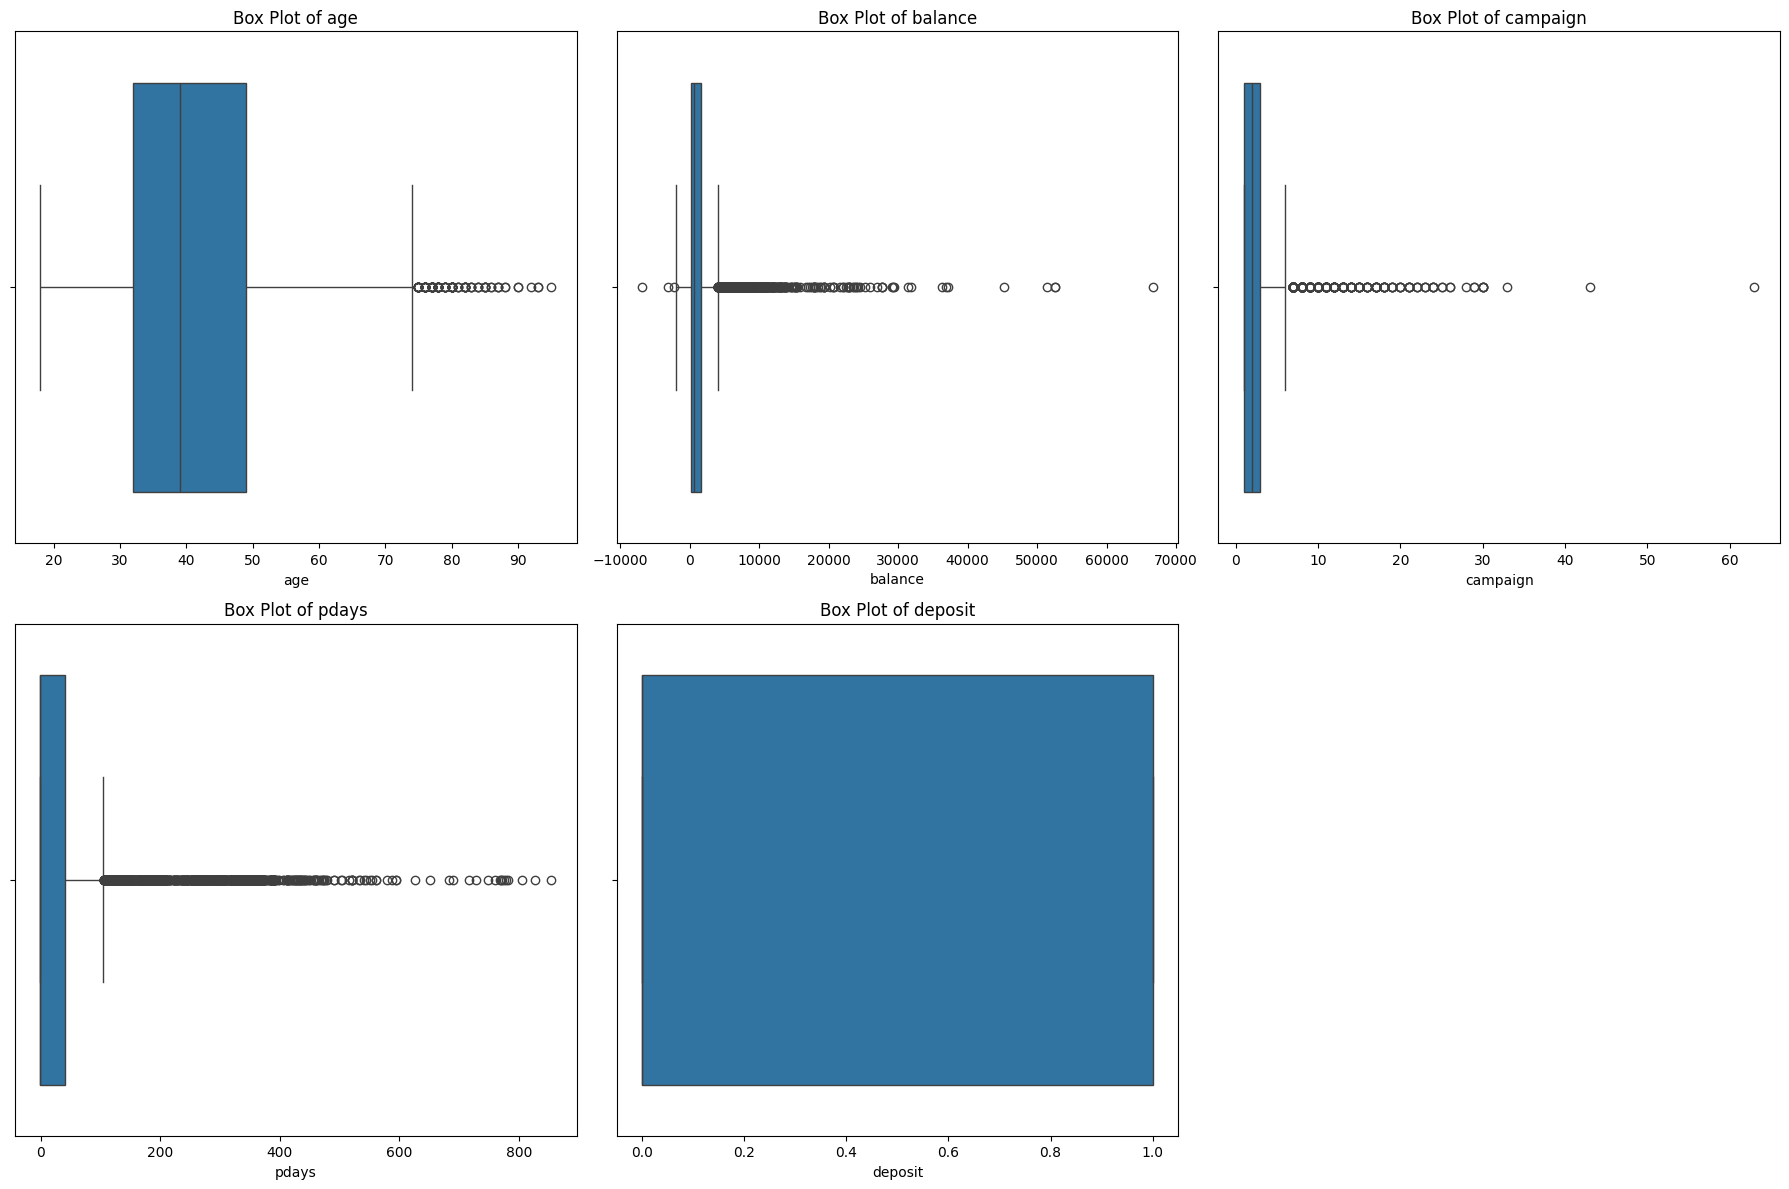

In [9]:
def numerical_boxplots(data):                                                           
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    num_plots = len(numerical_columns)
    num_rows = (num_plots + 2) // 3

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.ravel()                                                                 

    for i, column in enumerate(numerical_columns):                                      
        sns.boxplot(data=data, x=column, ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')

    # Hide any empty subplots
    for i in range(num_plots, num_rows * 3):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


numerical_boxplots(df)

Dari setiap boxplot di atas, tidak perlu menghilangkan outlier. Ini karena semua nilai berisi informasi berharga yang tidak mempengaruhi klasifikasi secara negatif.

## EDA (Exploratory Data Analysis)

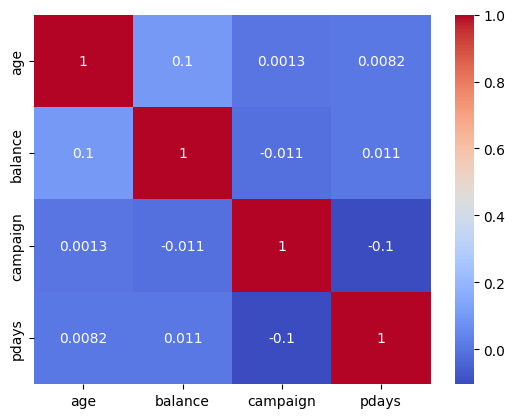

In [10]:
correlation_matrix = df[['age', 'balance', 'campaign', 'pdays']].corr()
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=True)
plt.show()

Berdasarkan heatmap, terdapat korelasi negatif antara kolom 'campaingn' dan 'pdays'. Hal ini menunjukkan bahwa jika calon pelanggan lebih sering dihubungi selama kampanye, maka jumlah hari yang berlalu sejak kontak terakhir akan berkurang.

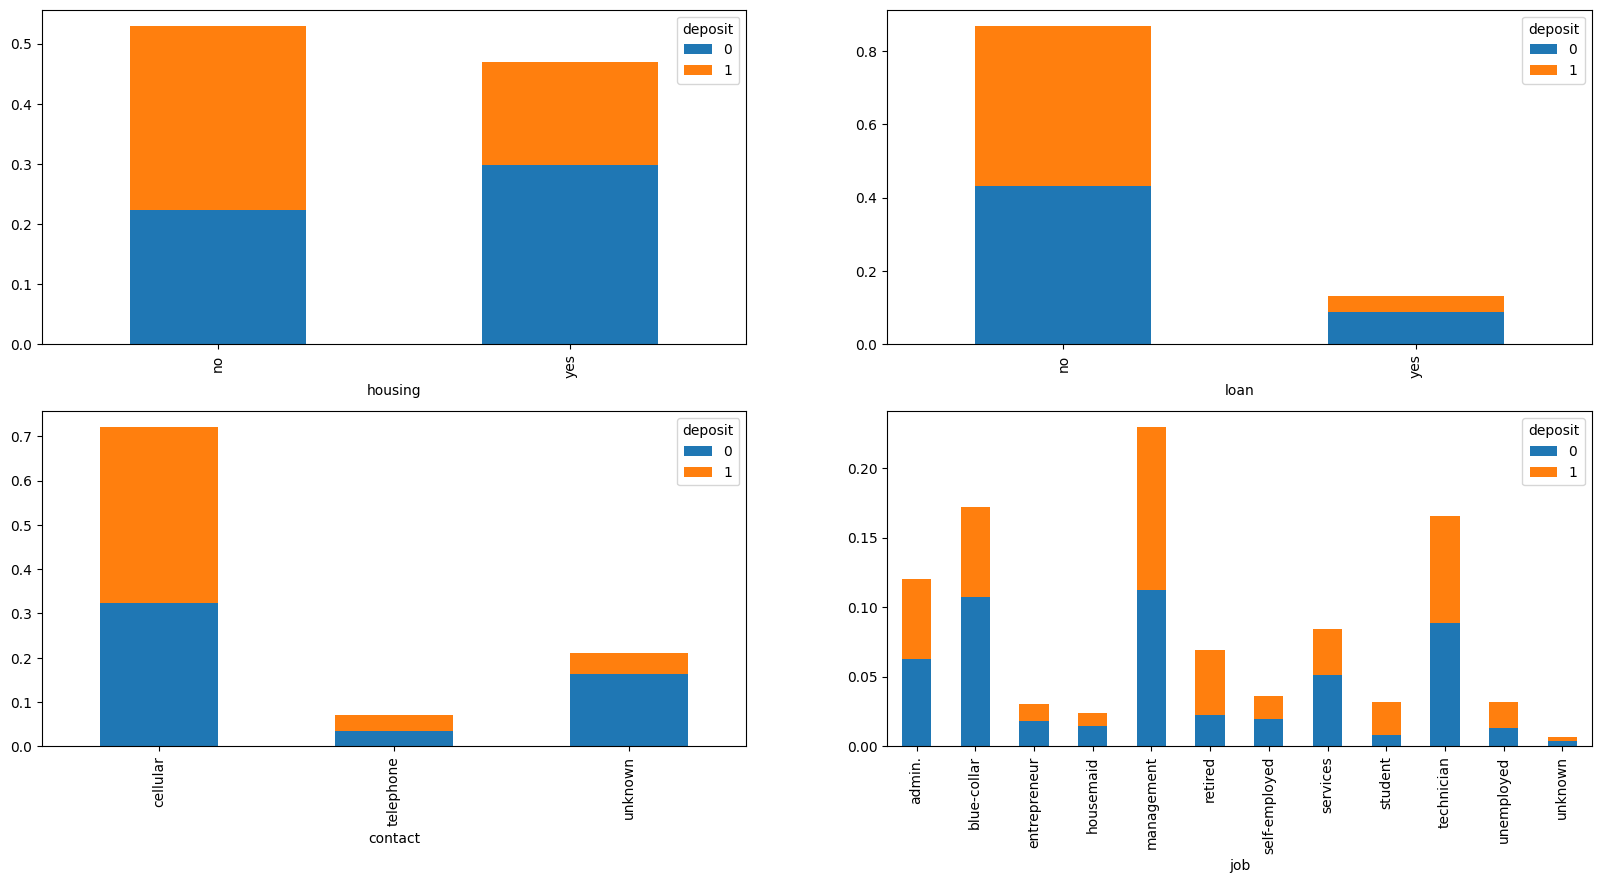

In [11]:
count = 0
fig = plt.figure(figsize=(20,20))
for i in df[['housing','loan','contact','job']]:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['deposit'],normalize=True).plot(kind='bar',stacked=True,ax=ax)
plt.show()

1. Berdasarkan barplot `housing`, calon nasabah yang tidak memiliki KPR cenderung memiliki potensi minat simpanan yang lebih tinggi dibandingkan dengan yang memiliki KPR.
2. Berdasrakan barplot `loan`, Calon nasabah yang tidak memiliki pinjaman pribadi cenderung memiliki potensi minat simpanan yang lebih tinggi dibandingkan dengan yang memiliki pinjaman.
3. Berdasarkan barplot `contact`, menghubungi calon nasabah melalui komunikasi seluler mempunyai potensi lebih tinggi dalam menarik minat calon nasabah yang berminat melakukan deposit.
4. Berdasarkan barplot `job`, calon nasabah yang bekerja di bidang manajemen memiliki potensi minat simpanan yang lebih tinggi.

## Data Preprocessing - Feature Engineering 

1. Ganti kolom nilai `deposit` (target) dari 'yes' menjadi '1' dan dari 'no' menjadi '0'.

In [12]:
df['deposit'] = df['deposit'].replace({'no':0,'yes':1}) 

2. Splitting dataset

In [13]:
X = df.drop(columns=['deposit'])
y = df['deposit']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.2)

3. Kemudian saya ingin melakukan feature encoding dan scaling untuk fitur kategorikal dan numerik dalam kumpulan data. Yang saya lakukan adalah:
- Kategorikal
     - Merubah fitur kolom `job` menggunakan Binery Encoding karena kolom tersebut tidak memiliki urutan bawaan dan memiliki 12 nilai unik. Jika saya menggunakan One Hot Encoding, akan menghasilkan terlalu banyak kolom baru, yang berpotensi menyebabkan overfitting.
     - Merubah fitur kolom `housing` menggunakan One Hot Encoding karena kolom tersebut tidak memiliki urutan bawaan dan hanya memiliki 2 nilai unik.
     - Merubah fitur kolom kolom `loan` menggunakan One Hot Encoding karena kolom tersebut tidak memiliki urutan bawaan dan hanya memiliki 2 nilai unik.
     - Merubah fitur  kolom `Contact` menggunakan One Hot Encoding karena kolom tersebut tidak memiliki urutan bawaan dan hanya memiliki 3 nilai unik.
     - Merubah fitur kolom `month` menggunakan Ordinal Encoding karena kolom tersebut memiliki urutan bawaan dan memiliki 12 nilai unik.
     - Merubah fitur kolom `poutcome` menggunakan One Hot Encoding karena kolom tersebut tidak memiliki urutan bawaan dan memiliki 4 nilai unik.

- Numerikal
     - Menerapkan penskalaan pada kolom `balance`, dengan mempertimbangkan nilai minimum -6847 dan nilai maksimum 66653. Tujuannya adalah untuk berpotensi meningkatkan hasil pemodelan. Saya akan menggunakan metode RobustScaler untuk memastikan bahwa data tetap teratur dan tidak sensitif terhadap outlier.
     - Menerapkan penskalaan pada kolom `campaign`, meskipun nilai minimumnya adalah 1 dan nilai maksimumnya adalah 63. Tujuannya adalah untuk berpotensi meningkatkan hasil pemodelan. Saya akan menggunakan metode RobustScaler untuk menjaga urutan data dan memastikan bahwa data tidak terpengaruh oleh outlier.
     - Menerapkan penskalaan pada kolom `pdays`, meskipun nilai minimumnya -1 dan nilai maksimumnya 854. Tujuannya adalah untuk berpotensi meningkatkan hasil pemodelan. Saya akan menggunakan metode RobustScaler untuk menjaga urutan data dan membuatnya kuat terhadap outlier.
     - Menerapkan penskalaan pada kolom `age` karena sudah memiliki interval yang jelas untuk membedakan usia setiap calon pelanggan, dan rentang nilainya tidak terlalu besar, minimal 18 dan maksimal 95.

In [14]:
ct = ColumnTransformer(transformers=[
    ("BinaryEncoding",ce.BinaryEncoder(),['job']),
    ("OrdinalEncoding",ce.OrdinalEncoder(),['month']),
    ("OneHotEncoding",OneHotEncoder(drop='first'),['housing','loan','contact','poutcome']),
    ("RobustScaler",RobustScaler(),['balance','campaign','pdays']),
],remainder='passthrough',verbose_feature_names_out=False)

ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('BinaryEncoding', BinaryEncoder(), ['job']),
                                ('OrdinalEncoding', OrdinalEncoder(),
                                 ['month']),
                                ('OneHotEncoding', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact', 'poutcome']),
                                ('RobustScaler', RobustScaler(),
                                 ['balance', 'campaign', 'pdays'])],
                  verbose_feature_names_out=False)

In [15]:
bin_cols = ct.named_transformers_['BinaryEncoding'].get_feature_names_out()
ord_cols = ct.named_transformers_['OrdinalEncoding'].get_feature_names_out()
ohe_cols = ct.named_transformers_['OneHotEncoding'].get_feature_names_out()
scal_cols = ct.named_transformers_['RobustScaler'].get_feature_names_out()
all_cols = list(ohe_cols) + list(ord_cols) + list(bin_cols) + list(scal_cols) + ['age']

In [16]:
X_train_pre = ct.fit_transform(X_train)
df_Xtrain_pre = pd.DataFrame(X_train_pre,columns=all_cols)
df_Xtrain_pre

,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month,job_0,job_1,job_2,job_3,balance,campaign,pdays,age
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.246326,-0.5,0.000000,36.0
1,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.335783,2.5,0.000000,33.0
2,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.241214,-0.5,2.079096,32.0
3,0.0,0.0,1.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.187540,0.0,0.000000,55.0
4,0.0,1.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094888,-0.5,7.299435,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.197125,0.0,0.000000,28.0
6240,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.361981,-0.5,0.000000,56.0
6241,0.0,1.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.029712,0.0,4.451977,32.0
6242,1.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.022045,-0.5,0.000000,33.0


## Model Benchmark

In [17]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=2020)
rf = RandomForestClassifier(random_state=2020)
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()

models = [logreg,knn,tree,rf,gbc,abc]
name_models = ['LogisticRegression','KNN','DecisionTree','Random Forest','GradientBoosting','AdaBoosting']

1. Check 'Target' proposrsi

In [18]:
y.value_counts(normalize=True)

deposit
0    0.522101
1    0.477899
Name: proportion, dtype: float64

Berdasarkan pengecekan proporsi di atas, proporsi nilai 0 dan 1 seimbang, dengan selisih kurang dari 10% (4,5%). Oleh karena itu, tidak perlu menggunakan metode Imbalance untuk menyeimbangkan proporsi sasaran.

2. Membuat prediksi pada data latih dan uji dengan menggunakan `Cross Validation`

In [19]:
def pipeline_cross_validation(model):
    pipe = Pipeline([
        ("Column Transform",ct),
        ("Model",model)
    ],verbose=False)    
    return pipe

In [20]:
test_score = []
for model in models:
    pipeline = pipeline_cross_validation(model)
    pipeline.fit(X_train,y_train)    
    test_predict = pipeline.predict(X_test)
    test_predict_score= roc_auc_score(y_test,test_predict)
    test_score.append(test_predict_score)

In [21]:
def cross_validation(model,X_train,y_train):
    pipe = pipeline_cross_validation(model)
    pipe = pipe.fit(X_train,y_train)
    cross_val = cross_val_score(pipe,X_train,y_train,cv=StratifiedKFold(n_splits=5),scoring='roc_auc')
    return cross_val

In [22]:
train_score_cval = []
mean_score_cval = []
std_score_cval =[]
for model in models:
    score_roc_auc = cross_validation(model,X_train,y_train)
    mean_score_roc_auc = np.mean(score_roc_auc)
    std_score_roc_auc = np.std(score_roc_auc)
    train_score_cval.append(score_roc_auc)
    mean_score_cval.append(mean_score_roc_auc)
    std_score_cval.append(std_score_roc_auc)

In [23]:
data_mean_std_test_cval = list(zip(name_models,mean_score_cval,std_score_cval,test_score))
df_train_score_cval = pd.DataFrame(data=train_score_cval,columns=['Iteration1','Iteration2','Iteration3','Iteration4','Iteration5'],index=name_models).reset_index().rename(columns={'index':'Model'})
df_mean_std_test_cval = pd.DataFrame(data=data_mean_std_test_cval,columns=['Model','Mean Score Cval','Std Score Cval','Test Score'])
df_cross_validation = df_train_score_cval.merge(df_mean_std_test_cval,on='Model')
df_cross_validation

,Model,Iteration1,Iteration2,Iteration3,Iteration4,Iteration5,Mean Score Cval,Std Score Cval,Test Score
0,LogisticRegression,0.722043,0.735033,0.752838,0.744913,0.734295,0.737824,0.010440,0.689293
1,KNN,0.660742,0.702780,0.714091,0.684045,0.694429,0.691217,0.018151,0.655256
2,DecisionTree,0.608910,0.630152,0.611451,0.617641,0.619498,0.617530,0.007409,0.619400
3,Random Forest,0.746447,0.754243,0.769598,0.757733,0.756464,0.756897,0.007463,0.710730
4,GradientBoosting,0.764319,0.774196,0.788900,0.778771,0.771494,0.775536,0.008161,0.731737
5,AdaBoosting,0.749811,0.768351,0.779593,0.765156,0.762444,0.765071,0.009607,0.722978


Berdasarkan tabel di atas, setelah melakukan prediksi pada data pelatihan dan pengujian menggunakan metode evaluasi metrik 'ROC_AUC' dan 'Cross Validation', saya mendapat insight sebagai berikut :

- Dari Iterasi1 hingga Iterasi5 dan nilai deviasi standarnya, terlihat bahwa semua model menunjukkan performa yang relatif stabil.
- Model `DecisionTreeClassifier` dan `KNeighborsClassifier` menunjukkan underfitting. Hal ini dapat disimpulkan dari nilai yang lebih rendah pada 'Mean Score Cval' dan 'Test Score'.
- Model `GradientBoostingClassifier` secara konsisten mencapai nilai tertinggi dan relatif stabil untuk 'Mean Score Cval' dan 'Test Score'.


## Hyperparameter Tunning

Penjelasan singkat GradientBoosting :

GradientBoosting adalah ansambel learning. Ini menggabungkan beberapa model prediktif lemah (seringnya Decision Tree), untuk menciptakan model prediktif yang kuat. Algoritma ini bekerja dengan menyesuaikan model baru secara berulang dengan residu (perbedaan antara nilai aktual dan prediksi) model sebelumnya, dengan tujuan meminimalkan kesalahan prediksi secara keseluruhan.

Pada GradientBoosting terdapat beberapa parameter penting yang dapat meningkatkan performa model saat melakukan tunning hyperparameter, yaitu :
1. Learning Rate : Mengontrol kontribusi setiap model yang lemah terhadap prediksi akhir. Kecepatan pemelajaran yang lebih rendah membuat model lebih konservatif namun memerlukan lebih banyak iterasi agar dapat menyatu.
2. Numbers of Estimator : Menentukan jumlah model lemah (pohon keputusan) yang akan dimasukkan ke dalam ansambel. Menambah jumlah penduga dapat meningkatkan performa model, namun juga dapat meningkatkan risiko overfitting.
3. Maximum depth : Membatasi kedalaman setiap pohon keputusan dalam ansambel. Pohon yang lebih dalam dapat menangkap hubungan yang lebih kompleks dalam data namun juga dapat menyebabkan overfitting.
4. Subsampel : Menentukan fraksi sampel yang akan digunakan untuk melatih setiap model yang lemah. Menggunakan nilai yang kurang dari 1,0 dapat menimbulkan keacakan dan membantu mengurangi overfitting.
5. Regularization parameters : Parameter ini, seperti min_samples_split, min_samples_leaf, dan max_features, mengontrol kompleksitas pohon keputusan individual dan membantu mencegah overfitting.
​

In [24]:
estimator = Pipeline([
    ("CTransform",ct),
    ("Model",GradientBoostingClassifier())
    
],verbose=False)

In [25]:
param_space = [
    {
    'Model__learning_rate' : [100,10,1,0.1,0.5,0.05],
    'Model__n_estimators' : [50,100,150,200,250],
    'Model__max_depth' : [1,3,5,7],
    'Model__subsample' : [1.0,2.0],
    }] 
gscv = GridSearchCV(estimator=estimator,n_jobs=-1,param_grid=param_space,cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=2020),scoring='roc_auc')
gscv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('CTransform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('BinaryEncoding',
                                                                         BinaryEncoder(),
                                                                         ['job']),
                                                                        ('OrdinalEncoding',
                                                                         OrdinalEncoder(),
                                                                         ['month']),
                                                                        ('OneHotEncoding',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome']),
                                                                        ('RobustScaler',
                                                                         RobustScaler(),
                                                                         ['balance',
                                                                          'campaign',
                                                                          'pdays'])],
                                                          verbose_feature_names_out=False)),
                                       ('Model',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid=[{'Model__learning_rate': [100, 10, 1, 0.1, 0.5, 0.05],
                          'Model__max_depth': [1, 3, 5, 7],
                          'Model__n_estimators': [50, 100, 150, 200, 250],
                          'Model__subsample': [1.0, 2.0]}],
             scoring='roc_auc')

In [26]:
best_params = gscv.best_params_
best_score = gscv.best_score_
display(best_score,best_params)

0.7745935543165106

{'Model__learning_rate': 0.05,
 'Model__max_depth': 5,
 'Model__n_estimators': 100,
 'Model__subsample': 1.0}

In [27]:
best_model = gscv.best_estimator_
best_model.fit(X_train,y_train)

Pipeline(steps=[('CTransform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('BinaryEncoding',
                                                  BinaryEncoder(), ['job']),
                                                 ('OrdinalEncoding',
                                                  OrdinalEncoder(), ['month']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['balance', 'campaign',
                                                   'pdays'])],
                                   verbose_feature_names_out=False)),
                ('Model',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5))])

In [28]:
estimator.fit(X_train,y_train)

Pipeline(steps=[('CTransform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('BinaryEncoding',
                                                  BinaryEncoder(), ['job']),
                                                 ('OrdinalEncoding',
                                                  OrdinalEncoder(), ['month']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['balance', 'campaign',
                                                   'pdays'])],
                                   verbose_feature_names_out=False)),
                ('Model', GradientBoostingClassifier())])

In [29]:
predict_default = estimator.predict(X_test)
predict_default_proba = estimator.predict_proba(X_test)
predict_tunned = best_model.predict(X_test)
predict_tunned_proba = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test,predict_default)
roc_auc_tunned = roc_auc_score(y_test,predict_tunned)

print(f"ROC_AUC Score Gradient sebelum di Tunning :", roc_auc_default)
print(f"ROC_AUC Score Gradient sesudah di Tunning :", roc_auc_tunned)

ROC_AUC Score Gradient sebelum di Tunning : 0.7317373641013832
ROC_AUC Score Gradient sesudah di Tunning : 0.7339643744140527


Berdasarkan hasil di atas, skor prediksi model `GradientBoosting` pada data pengujian sedikit meningkat dari 0,731 menjadi 0,733. Selanjutnya saya akan mengujinya pada classification report.

In [30]:
report_default = classification_report(y_test,predict_default)
report_tunned = classification_report(y_test,predict_tunned)

print(f"Classfication Default \n",report_default)
print(f"Classfication Tunned \n",report_tunned)

Classfication Default 
               precision    recall  f1-score   support

           0       0.71      0.84      0.77       815
           1       0.78      0.62      0.69       746

    accuracy                           0.74      1561
   macro avg       0.75      0.73      0.73      1561
weighted avg       0.74      0.74      0.73      1561

Classfication Tunned 
               precision    recall  f1-score   support

           0       0.71      0.85      0.77       815
           1       0.79      0.61      0.69       746

    accuracy                           0.74      1561
   macro avg       0.75      0.73      0.73      1561
weighted avg       0.75      0.74      0.73      1561



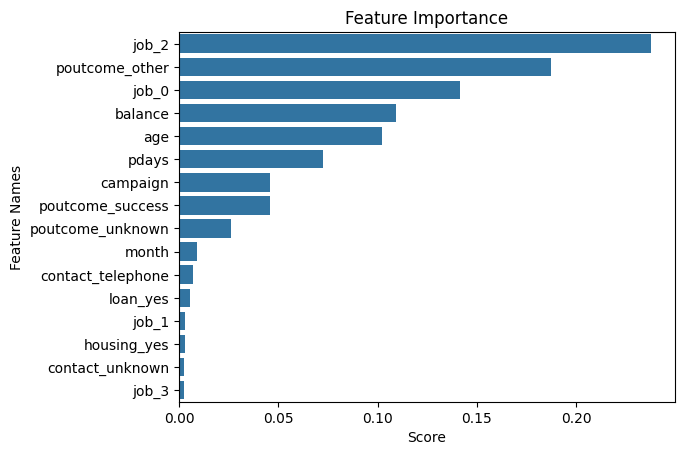

In [31]:
score = best_model['Model'].feature_importances_
feature_score = list(zip(all_cols,score))
feature_importances = pd.DataFrame(data=feature_score,columns=['Feature Names','Score']).sort_values('Score',ascending=False)
sns.barplot(x=feature_importances['Score'],y=feature_importances['Feature Names'],orient='h')
plt.title("Feature Importance")
plt.show()

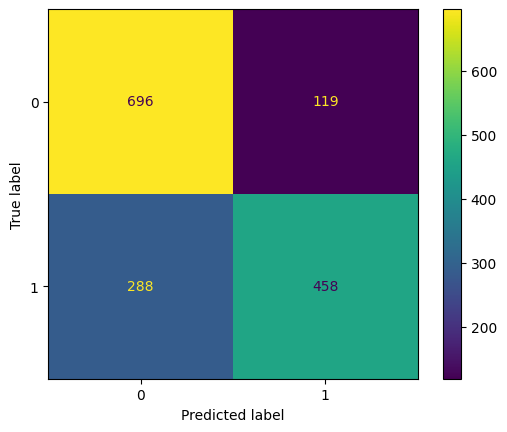

Classfication Tunned 
               precision    recall  f1-score   support

           0       0.71      0.85      0.77       815
           1       0.79      0.61      0.69       746

    accuracy                           0.74      1561
   macro avg       0.75      0.73      0.73      1561
weighted avg       0.75      0.74      0.73      1561



In [32]:
confusion_tunned = confusion_matrix(y_test,predict_tunned)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_tunned,display_labels=best_model.classes_)
disp.plot()
plt.show()
print(f"Classfication Tunned \n",report_tunned)

## Kesimpulan

Penarikan kesimpulan dari classification report di atas adalah model mampu mengurangi 84% nasabah yang tidak tertarik. Sebagai contoh, dari 100 nasabah yang secara aktual tidak tertarik, model mampu memprediksi 84 nasabah dengan benar. Namun, sisanya yang berjumlah 16 diprediksi sebagai nasabah yang tertarik. Model mampu mengurangi 84 nasabah yang tidak tertarik agar tidak dilakukan pendekatan (pemasaran). Model juga mampu mendapatkan 61% nasabah yang benar-benar tertarik (berdasarkan recall). Contoh tambahan, dari 100 nasabah yang tertarik secara ril, model mampu memprediksi 61 nasabah dengan benar. Tetapi, sisanya yang berjumlah 39 diprediksi sebagai nasabah yang tidak tertarik.

Model memiliki ketepatan prediksi terhadap kandidat yang tertarik sebesar 78%. Contohnya, dari 100 orang yang diprediksi model sebagai nasabah yang tertarik, model mampu mendapatkan 78 orang nasabah yang tertarik dengan benar (berdasarkan precision).

Salah satu cara Bank  melakukan pemasaran terhadap nasabah dengan menggunakan telepon, meskipun cara lain dapat saja digunakan karena pada fitur `contact` terdapat data ketegorikal berupa `other`. Asumsikan saja cara yang paling dominan digunakan oleh Bank  menggunakan telepon. Mengontak nasabah melalui telepon tentu saja memakan biaya. Diasumsikan biaya sekali telepon untuk mengontak nasabah sebesar 10$. Andaikan jumlah nasabah yang dimiliki dalam suatu periode berjumlah 100 orang, terdiri dari 50 orang tertarik dan 50 orang sisanya tidak tertarik. Perhitungannya sebagai berikut:

Tanpa Model (semua nasabah dikontak):
- Total Biaya: 100 nasabah x $10 = $1000
- Nasabah tertarik yang didapat: 50 orang (semua nasabah dikontak)
- Nasabah tertarik yang tidak didapat: 0 orang (semua nasabah dikontak)
- Biaya terbuang: 100 nasabah x $10 = $1000
- Penghematan: $0

Dengan Model (hanya calon konsumen yang diprediksi berminat saja yang akan ditawarkan):
 - Matriks Kebingungan :
 - TP: 61
 - TN: 84
 - FP: 16
 - FN: 39

Dari Confusion Matrix di atas, dari 100 calon nasabah (61+39), 61 diantaranya benar-benar berminat, dan 39 tidak berminat. Perhitungannya adalah sebagai berikut:
- Total Biaya -> 100 x 10 USD = 1000 USD.
- Total perolehan calon konsumen yang berminat -> 63 calon konsumen.
- Biaya yang terbuang => 39 x 10 USD = 390 USD (karena 39 calon pelanggan menolak dan menjadi sia-sia).

Berdasarkan contoh perhitungan di atas, model ini dapat mengurangi biaya biaya yang terbuang sebesar 39%, dari sebelumnya 1000 USD menjadi 390 USD.
   
Selain itu, model juga dapat memperkirakan atau meminimalkan biaya yang terbuang dengan nilai False Positive (FP). Jika dihitung, biaya yang terbuang dari False Positive (FP) adalah 160 USD (16 (FP) x 10 USD).
​


## Rekomendasi

1. Bank  perlu lebih detail terhadap data nasabah. Sebisa mungkin kurangi kategori data `(unknown)` dan `(other)` seperti pada fitur `contact` dan `poutcome`. Kedua kategori tersebut kurang merepresentasikan nasabah.
2. Mengingat data numerikal berpengaruh signifikan terhapad model yang dibuat, Bank  perlu mengubah tipe data pada beberapa fitur yang dapat diubah menjadi data numerikal, seperti fitur `housing` dan `loan`. Fitur tersebut dapat diubah menjadi data numerikal yang berisi nominal cicilan dan pinjaman nasabah
3. Bank perlu menambah beberapa fitur lain yang dapat berpengaruh terhadap model, terutama fitur yang memiliki data numerikal. Bank dapat menambah data pendapatan perbulan, pengeluaran nasabah perbulan, jumlah anak, dan pinjaman di bank lain
4. Jika dilakukan penambahan data, perlu dilihat apakah model masih relevan atau tidak karena pasti setiap model memiliki limitasi/batasan tersendiri. Bank dapat melakukan pemilihan model kembali yang sesuai dengan kondisi data terbaru. Tambahkan pula model yang lebih kompleks.
5. Perlu diketahui bahwa setiap model memiliki limitasi/batasan. Model yang dibuat saat ini hanya cocok pada dataset yang balance. Jika data terbaru memiliki data yang imbalance, perlu dilakukan pendekatan oversampling atau undersampling, tergantung dari kondisi data terbaru. Jika terjadi penambahan data, tidak menutup kemungkinan model saat ini mememiliki masalah overfitting. Perlu dilakuan perlakukan khusus agar masalah overfitting dapat dihindari.